In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

PATH = "drive/MyDrive/NLP/Images"
df = pd.read_excel("drive/MyDrive/NLP/combined.xlsx")
df[df['type']=="original"]

,precision,recall,f1,accuracy,model,split,type
15,0.769052,0.825444,0.796251,0.954200,emission,train,original
16,0.733388,0.715276,0.724219,0.932056,emission,validation,original
17,0.726065,0.714904,0.720441,0.932257,emission,test,original
18,0.875253,0.857969,0.866524,0.966151,Beam Search,train,original
19,0.694780,0.735269,0.714451,0.927564,Beam Search,validation,original
20,0.697936,0.743034,0.719779,0.928126,Beam Search,test,original
21,0.876914,0.862527,0.869661,0.967159,viterbi,train,original
22,0.742366,0.783238,0.762255,0.934223,viterbi,validation,original
23,0.744276,0.789507,0.766225,0.934748,viterbi,test,original
24,0.919244,0.980382,0.919688,0.918800,LSTM,train,original


In [ ]:
import os
for i in os.listdir("drive/MyDrive/NLP"):
# for i in os.listdir():
  if i.endswith("png"):
    os.remove(PATH+i)

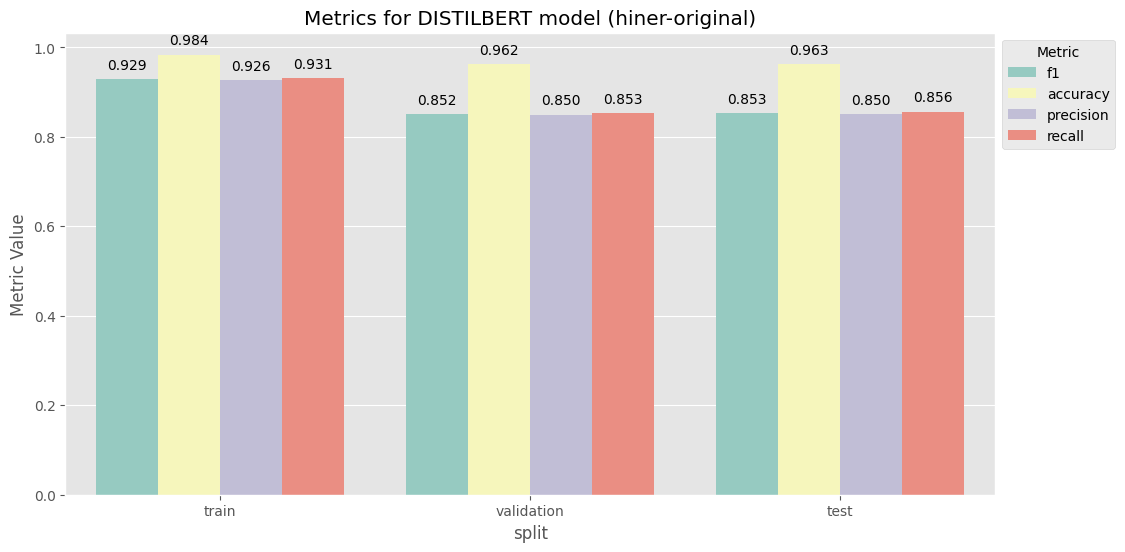

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your dataset as a DataFrame named df

# Define the model you want to plot
model_to_plot = "DISTILBERT"

# Filter the dataset for the specific model
model_data = df[df['model'] == model_to_plot]

# Define the metrics you want to plot
metrics = ['f1', 'accuracy', 'precision', 'recall']

# Create a figure and axis
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Melt the data to create a long-form DataFrame for Seaborn
model_data_long = pd.melt(model_data, id_vars=["split", "model"], value_vars=metrics, var_name="metric", value_name="value")

# Use Seaborn to create the grouped bar plot
sns.barplot(data=model_data_long, x="split", y="value", hue="metric", palette="Set3")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set axis labels and title
plt.title(f'Metrics for {model_to_plot} model (hiner-original)')
plt.xlabel('split')
plt.ylabel('Metric Value')

# Display a legend
plt.legend(title='Metric', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()


In [ ]:
S

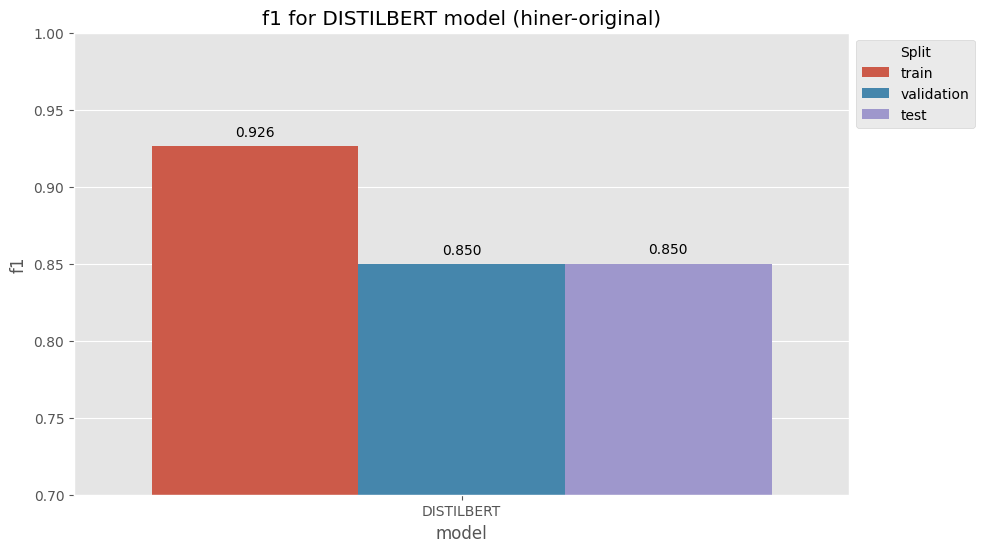

In [ ]:
# @title accuracy for all splits
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metrics_by_model(df, metric, dataset="original", model="emission"):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df[df['model']==model], x="model", y='f1', hue='split')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(x, '.2f')))

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.title(f'{metric} for {model} model (hiner-{dataset})')
    # plt.xlabel(model)
    plt.ylabel(metric)
    plt.ylim([0.7,1])
    plt.legend(title='Split', bbox_to_anchor=(1, 1), loc='upper left')
    # plt.savefig(PATH+dataset+" "+metric+" by model", bbox_inches='tight')
    plt.show()


# plot_metrics_by_model(df, "original",'accuracy')
plot_metrics_by_model(df, 'f1',"original",  "DISTILBERT")
# plot_metrics_by_model(df, "original",'precision')
# plot_metrics_by_model(df, "original",'recall')

# plot_metrics_by_model(df, 'accuracy', 'collapsed')
# plot_metrics_by_model(df, 'f1', 'collapsed')
# plot_metrics_by_model(df, 'precision', 'collapsed')
# plot_metrics_by_model(df, 'recall', 'collapsed')

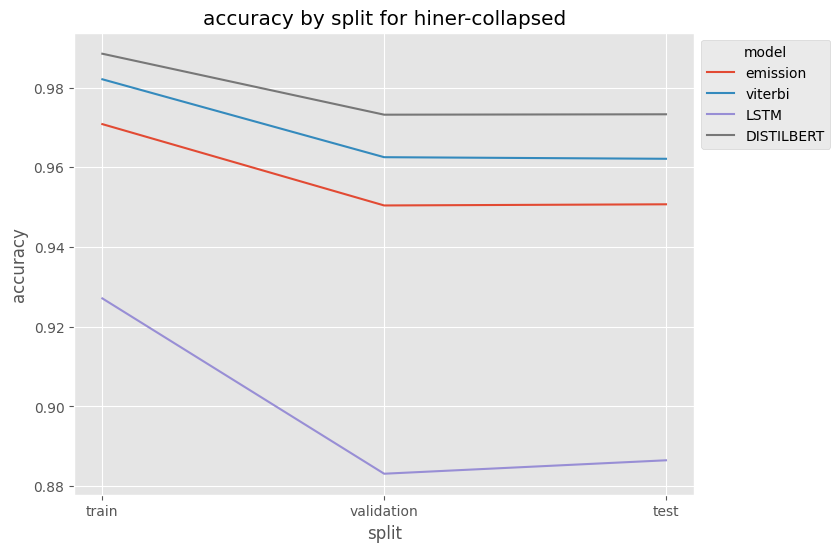

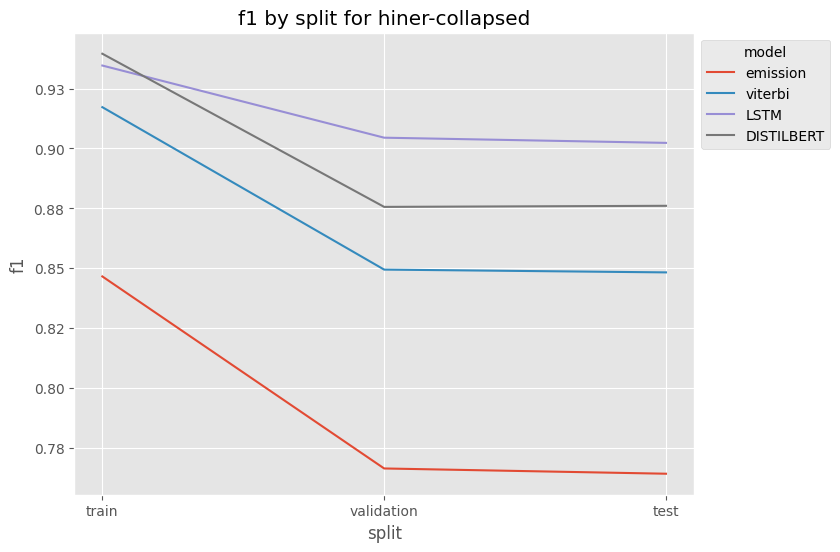

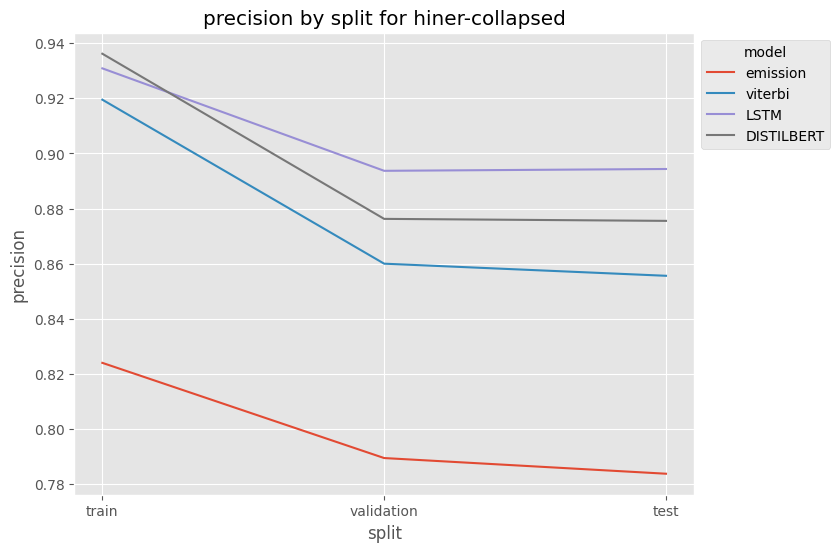

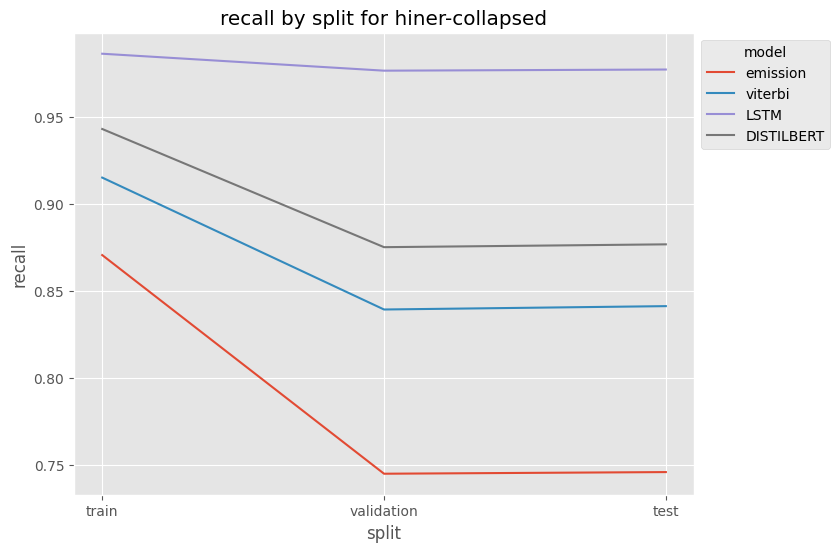

In [ ]:
# @title precision for each split
def plot_metrics_by_split(df, metric, dataset="original"):
    plt.figure(figsize=(8, 6))
    ax = sns.lineplot(data=df, x='split', y=metric, hue='model')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(x, '.2f')))

    plt.title(f'{metric} by split for hiner-{dataset}')
    plt.xlabel('split')
    plt.ylabel(metric)
    plt.legend(title='model', bbox_to_anchor=(1, 1), loc='upper left')

    plt.savefig(PATH+dataset+" "+metric+" by split", bbox_inches='tight')

    plt.show()

# plot_metrics_by_split(df, 'accuracy')
# plot_metrics_by_split(df, 'f1')
# plot_metrics_by_split(df, 'precision')
# plot_metrics_by_split(df, 'recall')


plot_metrics_by_split(df, 'accuracy', 'collapsed')
plot_metrics_by_split(df, 'f1', 'collapsed')
plot_metrics_by_split(df, 'precision', 'collapsed')
plot_metrics_by_split(df, 'recall', 'collapsed')